# Grading Criteria
10% for coming up with your own problem definition based on a dataset <br>
10% for data preparation and cleaning to suit the problem of your choice<br>
20% for exploratory data analysis/visualization to gather relevant insights<br>
20% for the use of machine learning techniques to solve specific problem<br>
20% for the presentation of data-driven insights and the recommendations<br>
10% for the quality of your final team presentation and overall impressions<br>
10% for learning something new and doing something beyond this course<br>

## Background
Always wondered how the starting positions of F1 drivers are determined? This is where the qualifying session comes into play. Qualifying sessions determines the starting grid of the drivers for the actual race. It is split into three rounds, known as Q1, Q2, Q3. <br>

Q1: All cars participate in Q1, which lasts for 18 minutes. The aim is to set a fast enough time to advance to Q2. The slowest five or six drivers (depending on the season) are elminated at the end of Q1. <br>

Q2: The remaining cars from Q1 mvoe on to Q2, which lasts for 15 minutes. Again, the aim is similiar to Q1, set a fast enough time to advance to Q3. The slowest five or six drovers are eliminated at the end of Q2. <br>

Q3: The top ten cars from Q2 advance into Q3, which lasts for 12 minutes. Here, the driverse compete for the pole position and the top spots on the grid. (Pole position refers to the most favourable position at the start of the race.) <br>

Here are some rules (not exhaustive) that have been updated in the recent years: <br>
1) **Grid Penalties:** If a driver receivesa grid penalty, they may be demoted a certiain number of places in the grid.  These penalities can be for various reasons, such as exceeding engine component limits, causing a collision in a previous race, or impeding another driver during qualifiying. <br>

2) **Tyres Rules:** In the recent years, tyre rules have also influenced qualifying strategies. Drivers must start the race on the same set of tyres they used in Q2, which adds a tactical element to tire management during qualifying.

## Problem Formulation:


**Problem Statement:** 
- With the dataset that we are given, we are trying to predict the driver who will make it to the pole position in a Formula 1 race.

**Input:** 
- Historical data from previous races, including driver peformance metrics such as lap times, sector times, top speeds, and track type during qualifying sessions.
- Driver-specific information such as team, car performance and driver statistics (e.g. previous qualifying results, race results)

**Output:**
- Probability indicating which driver will most likely be the fastest and make it to the pole position.

In [54]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Data preparation (10%)

The dataset given is split into the races that occured in that particular year. To make processing easier, we will be combining all these tabular data into 1 main dataset.

In [49]:
raceResults_df = pd.DataFrame()
years = ['2021','2022','2023']
for y in years:
    temp_df = pd.read_csv(f"./Race_Results/formula1_{y}season_raceResults.csv")
    temp_df['Year'] = y # we create a new column Year so that we can use it to extract relevant data of the track on that particular year
    raceResults_df = pd.concat([raceResults_df, temp_df])
raceResults_df

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap,Year,Set Fastest Lap,Fastest Lap Time
0,Bahrain,1,44,Lewis Hamilton,Mercedes,2.0,56,1:32:03.897,25.0,No,1:34.015,2021,NaN,NaN
1,Bahrain,2,33,Max Verstappen,Red Bull Racing Honda,1.0,56,+0.745,18.0,No,1:33.228,2021,NaN,NaN
2,Bahrain,3,77,Valtteri Bottas,Mercedes,3.0,56,+37.383,16.0,Yes,1:32.090,2021,NaN,NaN
3,Bahrain,4,4,Lando Norris,McLaren Mercedes,7.0,56,+46.466,12.0,No,1:34.396,2021,NaN,NaN
4,Bahrain,5,11,Sergio Perez,Red Bull Racing Honda,11.0,56,+52.047,10.0,No,1:33.970,2021,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Abu Dhabi,16,2,Logan Sargeant,Williams Mercedes,20.0,58,+87.791,0.0,NaN,NaN,2023,No,1:28.580
436,Abu Dhabi,17,24,Guanyu Zhou,Alfa Romeo Ferrari,19.0,58,+89.422,0.0,NaN,NaN,2023,No,1:28.746
437,Abu Dhabi,18,55,Carlos Sainz,Ferrari,16.0,57,DNF,0.0,NaN,NaN,2023,No,1:29.452
438,Abu Dhabi,19,77,Valtteri Bottas,Alfa Romeo Ferrari,18.0,57,+1 lap,0.0,NaN,NaN,2023,No,1:29.863


The 14 columns we have as of seems to be not comprehensive enough for us to explore/ gain any insights in regards to our problem. This is because we have a couple of columns that are not very insightful, e.g. 'No.', 'Points', 'Fastest Lap', '+1 Pt'. In this case, we shall explore another set of data that could possibly help us with making our predictions more comprehensive. Afterall, predicting such a race result is rather complex since it is affected by so many factors.

In [50]:
# Import the other datasets
seasonCalender_df = pd.DataFrame()
years = ['2020','2021','2022','2023']
for y in years:
    temp_df = pd.read_csv(f"./Season_Calenders/formula1_{y}season_calendar.csv")
    temp_df['Year'] = y # we create a new column Year so that we can use it to extract relevant data of the track on that particular year
    seasonCalender_df = pd.concat([seasonCalender_df, temp_df])
seasonCalender_df

,Round,Country,City,Circuit Name,GP Name,Race Date,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones,Year
0,1,Austria,Spielberg,Red Bull Ring,Austria,5 Jul 2020,1970,71,4.318,306.452,1:05.619,Carlos Sainz,2020,10,3,2020
1,2,Austria,Spielberg,Red Bull Ring,Styria,12 Jul 2020,1970,71,4.318,306.452,1:05.619,Carlos Sainz,2020,10,3,2020
2,3,Hungary,Budapest,Hungaroring,Hungary,19 Jul 2020,1986,70,4.381,306.630,1:17.103,Max Verstappen,2019,14,2,2020
3,4,Great Britain,Silverstone,Silverstone Circuit,Great Britain,2 Aug 2020,1950,52,5.891,306.198,1:27.097,Max Verstappen,2020,18,2,2020
4,5,Great Britain,Silverstone,Sliverstone Circuit,70th Anniversary,9 Aug 2020,1950,52,5.891,306.198,1:27.097,Max Verstappen,2020,18,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,19,United States,Austin,Circuit of The Americas,Lenovo United States GP,22/10/2023,2012,56,5.513,308.405,1:36.169,Charles Leclerc,2019,20,2,2023
19,20,Mexico,Mexico City,Autodromo Hermanos Rodriguez,Gran Premio de la Ciudad de México,29/10/2023,1963,71,4.304,305.354,1:17.774,Valtteri Bottas,2021,17,3,2023
20,21,Brazil,São Paulo,Autodromo Jose Carlos Pace,Rolex Grande Prêmio de São Paulo,05/11/2023,1973,71,4.309,305.879,1:10.540,Valtteri Bottas,2018,15,2,2023
21,22,United States,Las Vegas,Las Vegas Strip Circuit,Heineken Silver Las Vegas GP,18/11/2023,2023,50,6.201,309.958,1:35.490,Oscar Piastri,2023,17,2,2023


In [51]:
features_to_extract = ['DRS Zones', 'Turns', 'Circuit Length(km)']
for index, row in raceResults_df.iterrows():
    track = row['Track']
    year = row['Year']
    matching_race = seasonCalender_df[(seasonCalender_df['Country'] == track) & (seasonCalender_df['Year'] == year)]
    if not matching_race.empty:
        for feature in features_to_extract:
            f = matching_race[feature].iloc[0]
            raceResults_df.at[index, feature] = f
raceResults_df

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap,Year,Set Fastest Lap,Fastest Lap Time,DRS Zones,Turns,Circuit Length(km)
0,Bahrain,1,44,Lewis Hamilton,Mercedes,2.0,56,1:32:03.897,25.0,No,1:34.015,2021,NaN,NaN,3.0,15.0,5.412
1,Bahrain,2,33,Max Verstappen,Red Bull Racing Honda,1.0,56,+0.745,18.0,No,1:33.228,2021,NaN,NaN,3.0,15.0,5.412
2,Bahrain,3,77,Valtteri Bottas,Mercedes,3.0,56,+37.383,16.0,Yes,1:32.090,2021,NaN,NaN,3.0,15.0,5.412
3,Bahrain,4,4,Lando Norris,McLaren Mercedes,7.0,56,+46.466,12.0,No,1:34.396,2021,NaN,NaN,3.0,15.0,5.412
4,Bahrain,5,11,Sergio Perez,Red Bull Racing Honda,11.0,56,+52.047,10.0,No,1:33.970,2021,NaN,NaN,3.0,15.0,5.412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Abu Dhabi,16,2,Logan Sargeant,Williams Mercedes,20.0,58,+87.791,0.0,NaN,NaN,2023,No,1:28.580,2.0,16.0,5.281
436,Abu Dhabi,17,24,Guanyu Zhou,Alfa Romeo Ferrari,19.0,58,+89.422,0.0,NaN,NaN,2023,No,1:28.746,2.0,16.0,5.281
437,Abu Dhabi,18,55,Carlos Sainz,Ferrari,16.0,57,DNF,0.0,NaN,NaN,2023,No,1:29.452,2.0,16.0,5.281
438,Abu Dhabi,19,77,Valtteri Bottas,Alfa Romeo Ferrari,18.0,57,+1 lap,0.0,NaN,NaN,2023,No,1:29.863,2.0,16.0,5.281


Nice! Now we have a collated dataframe to work with. Next step would be to extract the relevant features we wish to use in our model. In this case, we would want to get the following features.

In [52]:
features = ['Driver', 'Team', 'Track', 'Fastest Lap Time', 'DRS Zones', 'Circuit Length(km)', 'Turns', 'Starting Grid']
cleaned_df = raceResults_df[features]
cleaned_df

,Driver,Team,Track,Fastest Lap Time,DRS Zones,Circuit Length(km),Turns,Starting Grid
0,Lewis Hamilton,Mercedes,Bahrain,NaN,3.0,5.412,15.0,2.0
1,Max Verstappen,Red Bull Racing Honda,Bahrain,NaN,3.0,5.412,15.0,1.0
2,Valtteri Bottas,Mercedes,Bahrain,NaN,3.0,5.412,15.0,3.0
3,Lando Norris,McLaren Mercedes,Bahrain,NaN,3.0,5.412,15.0,7.0
4,Sergio Perez,Red Bull Racing Honda,Bahrain,NaN,3.0,5.412,15.0,11.0
...,...,...,...,...,...,...,...,...
435,Logan Sargeant,Williams Mercedes,Abu Dhabi,1:28.580,2.0,5.281,16.0,20.0
436,Guanyu Zhou,Alfa Romeo Ferrari,Abu Dhabi,1:28.746,2.0,5.281,16.0,19.0
437,Carlos Sainz,Ferrari,Abu Dhabi,1:29.452,2.0,5.281,16.0,16.0
438,Valtteri Bottas,Alfa Romeo Ferrari,Abu Dhabi,1:29.863,2.0,5.281,16.0,18.0


## Exploratory Data Analysis (20%)

Now, let us build some intuition with the data we have. <br>
First, let us take a look at the number of times each driver made it into the top 3 for the actual race.

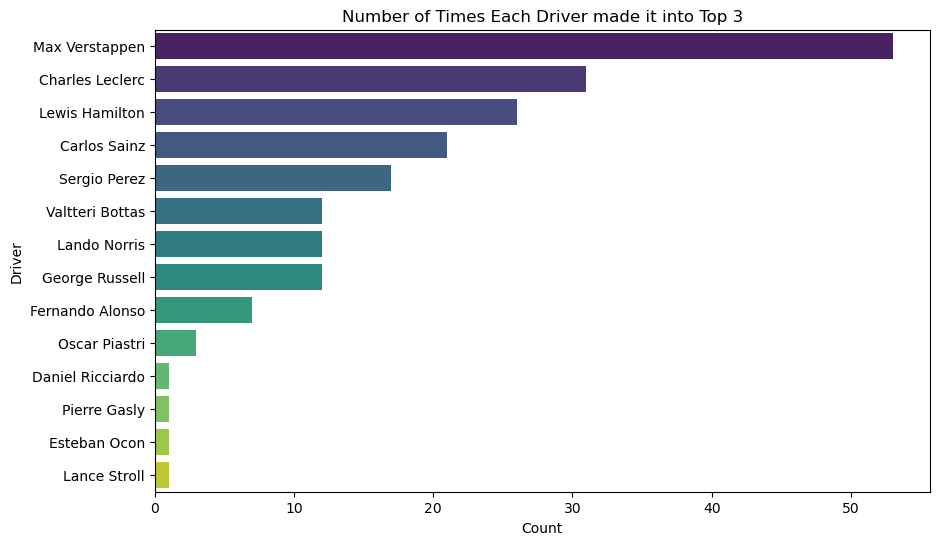

In [56]:
top3_df = cleaned_df[cleaned_df['Starting Grid']<=3]

plt.figure(figsize=(10,6))
sb.countplot(top3_df, y='Driver', order=top3_df['Driver'].value_counts().index, palette='viridis')
plt.title('Number of Times Each Driver made it into Top 3')
plt.xlabel('Count')
plt.ylabel('Driver')
plt.show()

Interesting, seems like Max Verstappen has been dominating the F1 qualifying rounds for the past 3 years, making it to the top 3 grid positions much more frequently than the other drivers. Charles Leclerc and Lewis Hamilton has been also making it to the top 3 grid positions rather frequently.

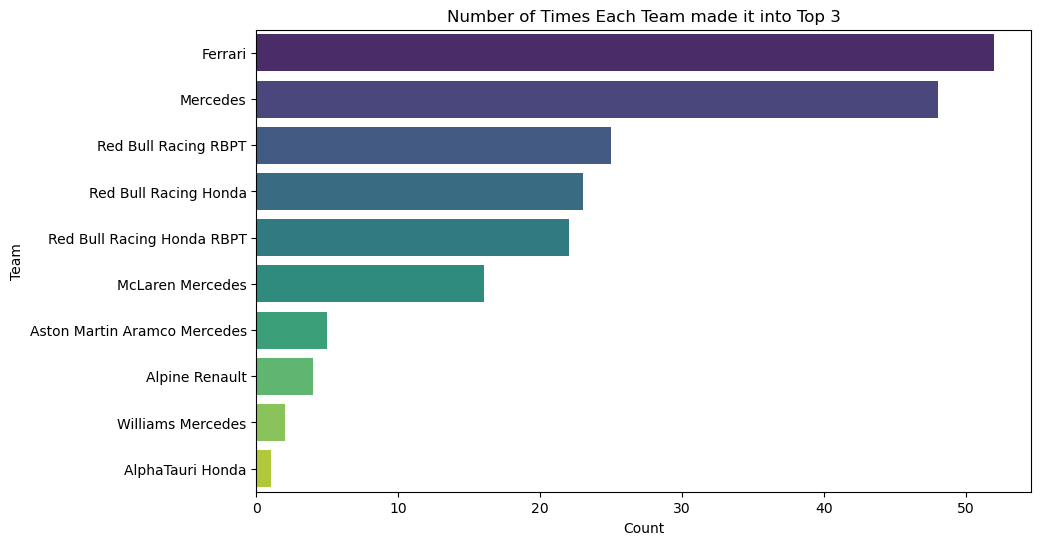

In [78]:
top3_df = cleaned_df[cleaned_df['Starting Grid']<=3]

plt.figure(figsize=(10,6))
sb.countplot(top3_df, y='Team', order=top3_df['Team'].value_counts().index, palette='viridis')
plt.title('Number of Times Each Team made it into Top 3')
plt.xlabel('Count')
plt.ylabel('Team')
plt.show()

Among the teams that achieved a top 3 grid position, Ferrari and Mercedes appear to be the most dominant, with Red Bull Racing RBPT following closely behind.

<function matplotlib.pyplot.show(close=None, block=None)>

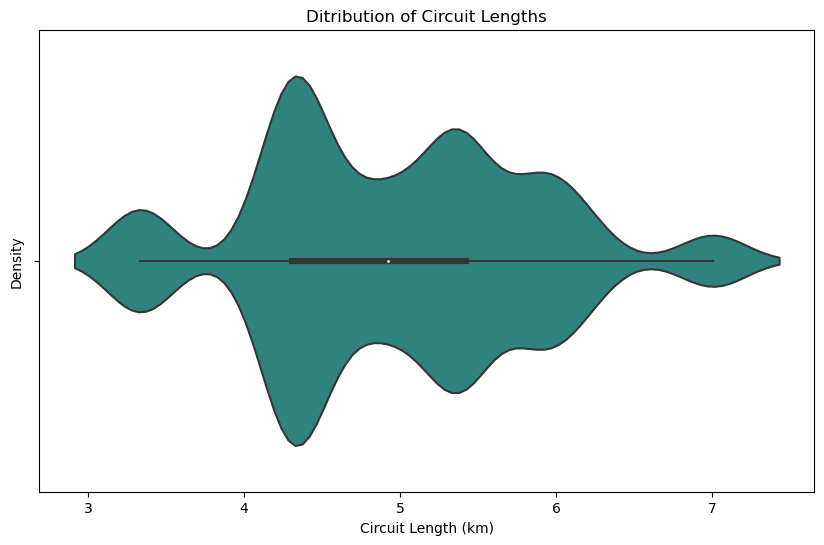

In [71]:
plt.figure(figsize=(10,6))
sb.violinplot(cleaned_df, x='Circuit Length(km)', palette='viridis')
plt.title('Ditribution of Circuit Lengths')
plt.xlabel('Circuit Length (km)')
plt.ylabel('Density')
plt.show

The graph above shows a concentration around 5km, indicating that this is a common length for Formula 1 race circuits. This could be due to standardization of race lengths or constraints related to circuit construction and safety requirements.

<function matplotlib.pyplot.show(close=None, block=None)>

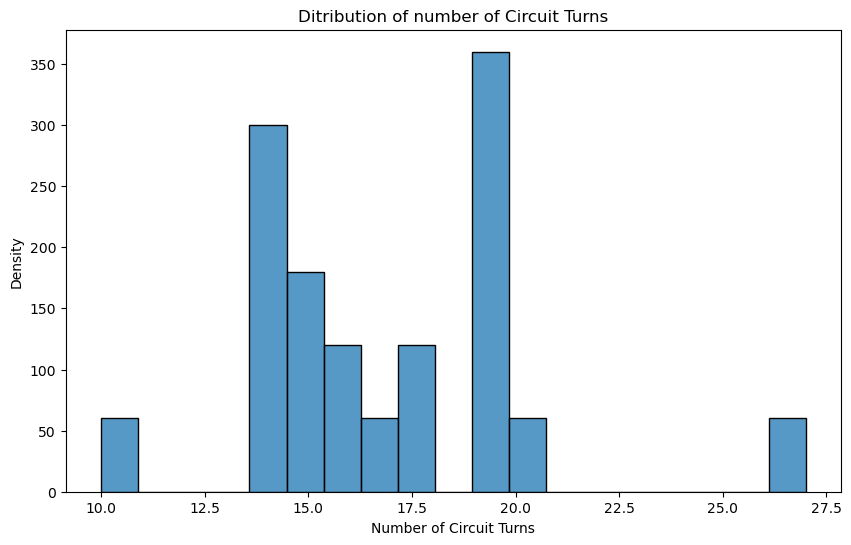

In [69]:
plt.figure(figsize=(10,6))
sb.histplot(cleaned_df, x='Turns')
plt.title('Ditribution of number of Circuit Turns')
plt.xlabel('Number of Circuit Turns')
plt.ylabel('Density')
plt.show

The common pattern that can be observed is that the number of turns in Formula 1 circuits commonly falls around 15 to 20. This pattern could be reflecting a balance between maintaining race complexity and ensuring driver safety that the same time.

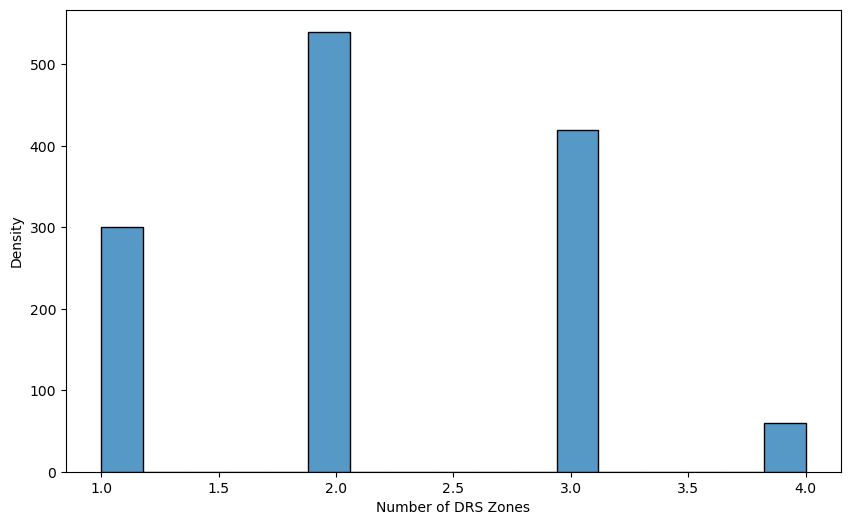

In [73]:
plt.figure(figsize=(10,6))
sb.histplot(cleaned_df, x='DRS Zones')
plt.xlabel('Number of DRS Zones')
plt.ylabel('Density')
plt.show()

The spread of DRS Zones does not seem very big, with most of the tracks with 2-3 DRS Zones for the race track.

## Machine Learning (20%)